In [1]:
from PIL import Image, ImageFilter
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
%matplotlib inline

Image Information: 
(1329, 1200, 3)


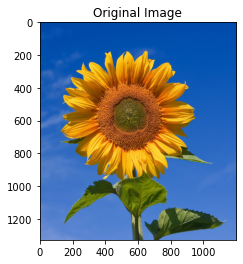

In [20]:
img = cv2.imread('Sunflower.jpg',1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original Image')
print('Image Information: ')
img_data=np.array(img)
print(img.shape)

In [21]:
img1 = cv2.imread('Sunflower.jpg',0)
[M,N] = img1.shape

# 1. Contrast Stretching Method 1

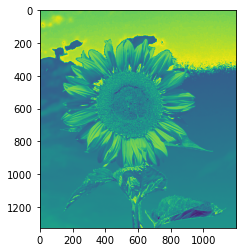

In [22]:
T1=28
T2=75
for i in range (M):
 for j in range (N):
  if(img1[i,j]>=T1) & (img1[i,j]<=T2):
   img1[i,j]=(227 * img1[i,j] -5040)/47
else:
 pass
plt.imshow(img1)

# 2. Contrast Stretching Method 2

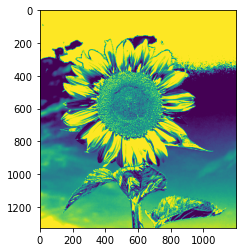

In [23]:
T1=90
T2=138
for i in range (M):
 for j in range (N):
  if (img1[i,j]<T1):
   img1[i,j]= 0
  elif (img1[i,j]>=T1) & (img1[i,j]<=T2):
   img1[i,j]=(255 * img1[i,j] -22950)/48
  elif (img1[i,j]>T2):
   img1[i,j]=255
plt.imshow(img1)

# 3.Logarithmic Transformation

45.98590442833571


C:\Users\USER\AppData\Local\Temp/ipykernel_13900/993365119.py:5: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(img + 1))


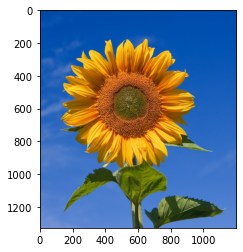

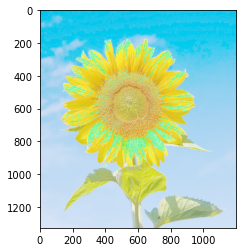

In [26]:
img = cv2.imread('Sunflower.jpg',1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
c = 255 / np.log(1 + np.max(img))
print(c)
log_image = c * (np.log(img + 1))
log_image = np.array(log_image, dtype = np.uint8)
plt.imshow(img)
plt.show()
plt.imshow(log_image)
plt.show()


# 4.Power-Law Transformation

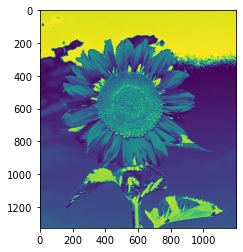

In [27]:
img = cv2.imread('Sunflower.jpg',0)
[M,N] = img.shape
x=[]
y=[]
c = 255 / np.log(1 + np.max(img))
for i in range (M):
 for j in range (N):
  img[i,j] = c * pow((img[i,j]),(1/2.5)) #gamma = 0.4
  x.append(img[i,j])
  y.append(img[i,j])
plt.imshow(img)